# Network Properties and Visualization

In this part we are going to get familiar with basics of [NetworkX](https://networkx.github.io/) and [Gephi](https://gephi.org/) for analysing and visualizing networks.

## Task 1

NetworkX is a Python library for the analysis of networks. With NetworkX you can create, import, manipulate graphs. Additionally, you can calculate some basic properties of these graphs with its built-in functions. Unfortunately, NetworkX is not very powerful for visualizing large graphs which we are going to work with most of the time. For this reason, we are going to use a software called Gephi. In this homework, you are going to do some basic analysis on some famous graphs and then store the results in a format readable by Gephi. You then use Gephi to have a meaningful visualization of these results.  

You can download Gephi from the following web page: [https://gephi.org/users/download](https://gephi.org/users/download).

You can also learn the basics of NetworkX library and Gephi by looking at the following pages.

Some useful links to get familiar with NetworkX:

- [https://vimeo.com/124354692](https://vimeo.com/124354692)
- [https://www.cl.cam.ac.uk/~cm542/teaching/2010/stna-pdfs/stna-lecture8.pdf](https://www.cl.cam.ac.uk/~cm542/teaching/2010/stna-pdfs/stna-lecture8.pdf)

Some useful links to get familiar with Gephi:

- [https://gephi.org/users/tutorial-visualization/](https://gephi.org/users/tutorial-visualization/)
- [https://www.youtube.com/watch?v=FLiv3xnEepw](https://www.youtube.com/watch?v=FLiv3xnEepw)

### Run the following cell to import the libraries that we are going to use in this homework:

In [1]:
%%time

%pylab inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings('ignore')
import time
import os

Populating the interactive namespace from numpy and matplotlib
CPU times: user 664 ms, sys: 485 ms, total: 1.15 s
Wall time: 1.13 s


## Facebook

In [2]:
filename = "/datasets/ece227-fa19-public/data/facebook/facebook_combined.txt"

g1 = nx.read_edgelist(filename, create_using=nx.Graph(), nodetype=int)
n_nodes, n_edges = g1.order(), g1.size()

print("# nodes:", n_nodes)
print("# edges:", n_edges)

# nodes: 4039
# edges: 88234


### Degree distribution

In [3]:
# Update node attributes
for node in g1.nodes():
    g1.nodes[node]['deg'] = g1.degree[node]

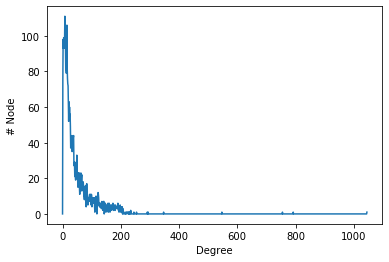

In [4]:
# Plot degree distribution
plt.xlabel("Degree")
plt.ylabel("# Node")
plt.plot(nx.degree_histogram(g1))

### Network diameter and average shortest path

In [4]:
%%time

connected = nx.is_connected(g1)

if connected is True:
    diameter = nx.diameter(g1)
    print("Network diameter:", diameter)
    
    avg_spl = nx.average_shortest_path_length(g1)
    print("Average Shortest path length:", avg_spl)

Network diameter = 8
Average Shortest path length = 3.6925068496963913
CPU times: user 6min 22s, sys: 65.3 ms, total: 6min 22s
Wall time: 6min 24s


### Clustering coefficients

Average clusterng coefficient = 0.6055467186200862


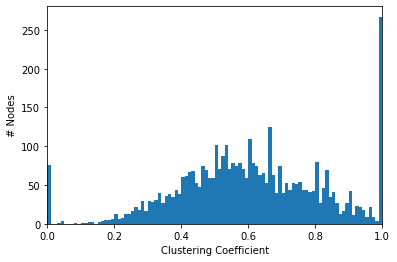

In [31]:
cc = nx.clustering(g1)

plt.hist(list(cc.values()), bins=100)
plt.xlabel('Clustering Coefficient')
plt.ylabel('# Nodes')
plt.xlim([0, 1])

print("Average clusterng coefficient:", mean(list(cc.values())))

### Degree centrality

Average degree centrality = 0.010819963503439287


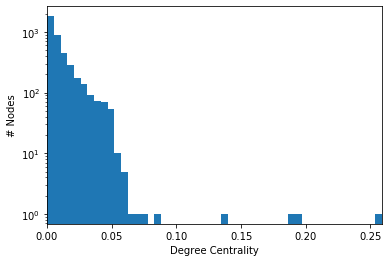

In [47]:
dc = nx.degree_centrality(g1)

plt.hist(list(dc.values()), bins=50, log=True)

plt.xlabel('Degree Centrality')
plt.ylabel('# Nodes')

plt.xlim([0, max(dc.values())])

print("Average degree centrality:", mean(list(dc.values())))

### Betweenness centrality

Average betweenness centrality: 0.0006669573568730229
CPU times: user 2min 27s, sys: 202 ms, total: 2min 27s
Wall time: 2min 28s


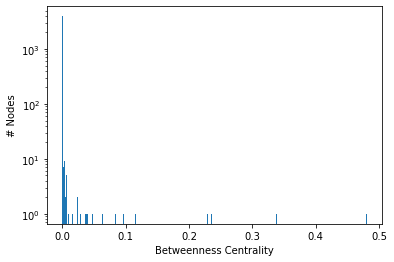

In [5]:
%%time

bc = nx.betweenness_centrality(g1)

# Update node attributes
for node in g1.nodes():
    g1.nodes[node]['bc'] = bc[node]

# Plot
plt.hist(list(bc.values()), bins=500, log=True)
plt.xlabel('Betweenness Centrality')
plt.ylabel('# Nodes')

print("Average betweenness centrality:", mean(list(bc.values())))

### Eigenvector centrality

Average Eigenvector centrality = 0.003864340807927154


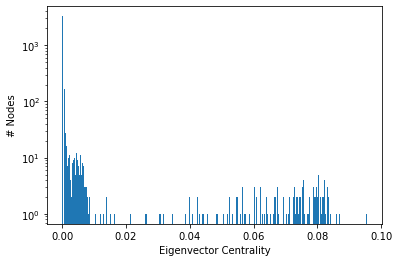

In [10]:
eigen_c = nx.eigenvector_centrality(g1)

plt.hist(list(eigen_c.values()), bins=500, log=True)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('# Nodes')

print("Average Eigenvector centrality:", mean(list(eigen_c.values())))

### Output as `GML`

Write a code to store the graph in a file that is readable by Gephi (Hint: Use NetworkX `write_gml` method.) Make sure to add the betweenness centrality and degree of each node as an attribute of each node to be stored in this file for the next task.

In [6]:
nx.write_gml(g1, "g1.gml")

## Enron email network analysis

In [3]:
filename2 = "/datasets/ece227-fa19-public/data/enron/email-Enron.txt"

g2 = nx.read_edgelist(filename2, create_using=nx.Graph(), nodetype=int)
node, edge = g2.order(), g2.size()

print("# nodes:", node)
print("# edges:", edge)

# nodes: 36692
# edges: 183831


### Degree distribution

In [4]:
# Update node attributes
for node in g2.nodes():
    g2.nodes[node]['deg'] = g2.degree[node]

(0, 80)

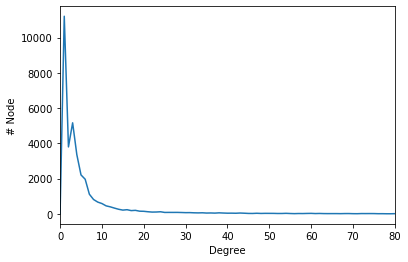

In [20]:
plt.xlabel("Degree")
plt.ylabel("# Node")
plt.plot(nx.degree_histogram(g2))
plt.xlim(0, 80)

### Network diameter and average shortest path

In [3]:
if nx.is_connected(g2) is True:
    diameter = nx.diameter(g2)
    print("Network diameter:", diameter)
    
    avg_spl = nx.average_shortest_path_length(g2)
    print("Average Shortest path length:", avg_spl)
else:
    print("The graph is not connected.")

The graph is not connected.


Since the network is not connected the network diameter and average shortest path are not well-defined. We can instead find these quantities for the **largest connected component** in the graph.

In [5]:
connected_components = list(nx.connected_component_subgraphs(g2, copy=True))
largest_cc = max(connected_components, key=lambda x: x.order())

print(nx.info(largest_cc))

Name: 
Type: Graph
Number of nodes: 33696
Number of edges: 180811
Average degree:  10.7319


As we can see, this largest connected component is almost the same size as the original graph. From now on we would just focus on analyzing this connected component.

In [6]:
g2 = largest_cc

In [36]:
%%time

diameter = nx.diameter(g2)
print("Network diameter:", diameter)

avg_spl = nx.average_shortest_path_length(g2)
print("Average Shortest path length:", avg_spl)

Network diameter: 13
Average Shortest path length: 4.025163988178407
CPU times: user 3h 30min 49s, sys: 4.99 s, total: 3h 30min 54s
Wall time: 3h 33min 23s


### Clustering coefficients

Average clusterng coefficient: 0.5091899019721599


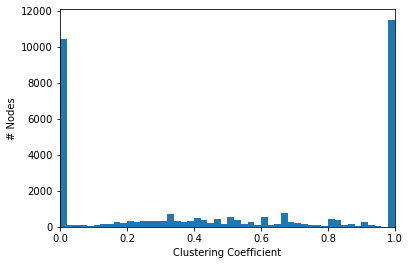

In [9]:
cc = nx.clustering(g2)

plt.hist(list(cc.values()), bins=50)
plt.xlabel('Clustering Coefficient')
plt.ylabel('# Nodes')
plt.xlim([0, 1])

print("Average clusterng coefficient:", mean(list(cc.values())))

### Degree centrality

Average degree centrality: 0.00031850117112520044


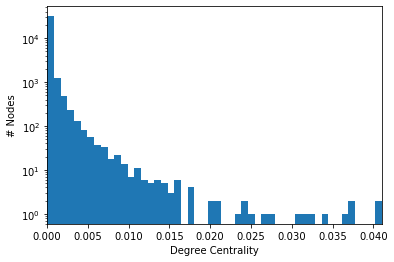

In [13]:
dc = nx.degree_centrality(g2)

plt.hist(list(dc.values()), bins=50, log=True)

plt.xlabel('Degree Centrality')
plt.ylabel('# Nodes')

plt.xlim([0, max(dc.values())])

print("Average degree centrality:", mean(list(dc.values())))

### Betweenness centrality

In [7]:
%%time

bc2 = nx.betweenness_centrality(g2)

# Update node attributes
for node in g2.nodes():
    g2.nodes[node]['bc'] = bc2[node]

CPU times: user 3h 10min 21s, sys: 8.29 s, total: 3h 10min 29s
Wall time: 3h 15min 3s


Average betweenness centrality: 0.0006669573568730229


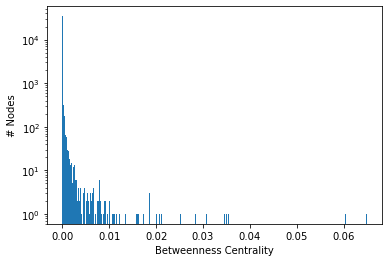

In [22]:
plt.hist(list(bc2.values()), bins=500, log=True)
plt.xlabel('Betweenness Centrality')
plt.ylabel('# Nodes')

print("Average betweenness centrality:", mean(list(bc.values())))

### Eigenvector centrality

Average Eigenvector centrality: 0.0015761693223108517


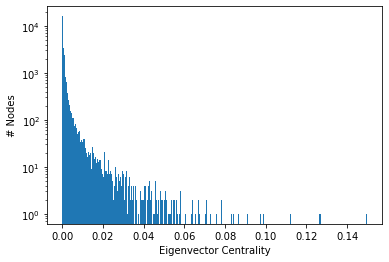

In [15]:
eigen_c = nx.eigenvector_centrality(g2)

plt.hist(list(eigen_c.values()), bins=500, log=True)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('# Nodes')

print("Average Eigenvector centrality:", mean(list(eigen_c.values())))

### Output as `GML`

Write a code to store the graph in a file that is readable by Gephi (Hint: Use NetworkX `write_gml` method.) Make sure to add the betweenness centrality and degree of each node as an attribute of each node to be stored in this file for the next task.

In [8]:
nx.write_gml(g2, "g2-2.gml")

## 'citNet'- Citation network analysis

In [ ]:
filename3 = "/datasets/ece227-fa19-public/data/citNet/citations.txt"

g3 = nx.read_edgelist(filename3, create_using=nx.DiGraph(), nodetype=int)
node, edge = g3.order(), g3.size()

print("# nodes:", node)
print("# edges:", edge)

### Degree distribution

In [54]:
from collections import Counter

in_degree, in_degree_count = zip(*Counter(dict(g3.in_degree()).values()).items())
out_degree, out_degree_count = zip(*Counter(dict(g3.out_degree()).values()).items())

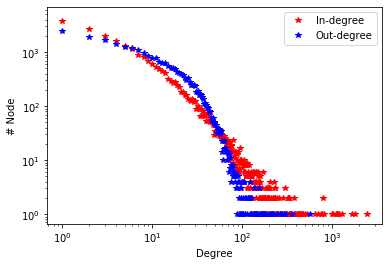

In [55]:
plt.xlabel("Degree")
plt.ylabel("# Node")
plt.loglog(in_degree, in_degree_count,
           c='r', linestyle='None', marker='*', label='In-degree')
plt.loglog(out_degree, out_degree_count,
           c='b', linestyle='None', marker='*', label='Out-degree')
plt.legend()

### Network diameter and average shortest path

In [3]:
if nx.is_connected(g3.to_undirected()) is True:
    diameter = nx.diameter(g3)
    print("Network diameter:", diameter)
    
    avg_spl = nx.average_shortest_path_length(g3)
    print("Average Shortest path length:", avg_spl)
else:
    print("The graph is not connected.")

The graph is not connected.


Since the network is not connected the network diameter and average shortest path are not well-defined. We can instead find these quantities for the **largest connected component** in the graph.

In [8]:
connected_components = list(nx.connected_component_subgraphs(g3.to_undirected(), copy=True))
largest_cc = max(connected_components, key=lambda x: x.order())

print(nx.info(largest_cc))

Name: 
Type: Graph
Number of nodes: 27400
Number of edges: 352059
Average degree:  25.6977


As we can see, this largest connected component is almost the same size as the original graph. From now on we would just focus on analyzing this connected component. Note that we have converted it to an **undirected** graph!

In [9]:
g3 = largest_cc

In [10]:
# Redo updating node degree attributes.
for node in g3.nodes():
    g3.nodes[node]['deg'] = g3.degree[node]

In [6]:
%%time
diameter = nx.diameter(g3)
print("Network diameter:", diameter)

Network diameter: 15
CPU times: user 2h 16min 59s, sys: 5.75 s, total: 2h 17min 5s
Wall time: 2h 20min 20s


In [7]:
%%time
avg_spl = nx.average_shortest_path_length(g3)
print("Average Shortest path length:", avg_spl)

Average Shortest path length: 4.278680083960654
CPU times: user 2h 8min 29s, sys: 1.13 s, total: 2h 8min 30s
Wall time: 2h 11min 1s


### Clustering coefficients

Average clusterng coefficient: 0.31391537950872084


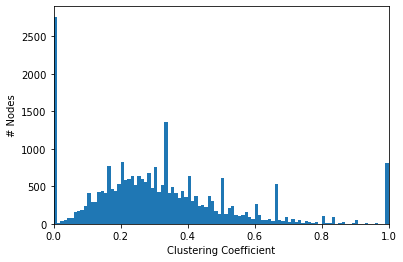

In [29]:
cc = nx.clustering(g3)

plt.hist(list(cc.values()), bins=100)
plt.xlabel('Clustering Coefficient')
plt.ylabel('# Nodes')
plt.xlim([0, 1])

print("Average clusterng coefficient:", mean(list(cc.values())))

### Degree centrality

Average degree centrality: 0.0009379078516105469


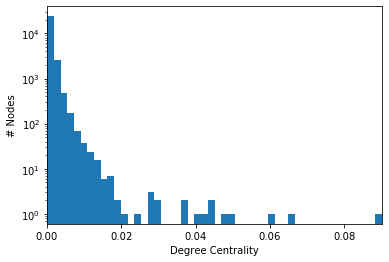

In [11]:
dc = nx.degree_centrality(g3)

# Update node attributes
for node in g3.nodes():
    g3.nodes[node]['dc'] = dc[node]

plt.hist(list(dc.values()), bins=50, log=True)

plt.xlabel('Degree Centrality')
plt.ylabel('# Nodes')

plt.xlim([0, max(dc.values())])

print("Average degree centrality:", mean(list(dc.values())))

### Add the author name as a node attribute

In [47]:
# Extract the author name
def get_authors(l):
    authors = reduce(list.__add__, [a.split(",") for a in l[9:].split("and")])
    return [x.strip() for x in authors]

# Attach the attribute author
import os
thred = sorted(dc.values(), reverse=True)[100]

from functools import reduce

for subdir, dirs, files in os.walk("data/citNet/cit-HepTh-abstracts"):
    for fl in files:
        filepath = subdir + os.sep + fl
        if filepath.endswith(".abs"):
            node_num = int(fl[:-4])
            name = ""
        for l in open(filepath):
            if l.startswith("Authors:"):
                name = get_authors(l)[0]
                if node_num in g3.nodes():
                    if g3.node[node_num]['dc'] > thred:
                        g3.node[node_num]['author'] = name
                    elif 'author' in g3.node[node_num]:
                        del g3.node[node_num]['author']

### Betweenness centrality

In [44]:
%%time
bc3 = nx.betweenness_centrality(g3)

# Update node attributes
for node in g3.nodes():
    g3.nodes[node]['bc'] = bc3[node]

CPU times: user 2h 31min 37s, sys: 4.07 s, total: 2h 31min 41s
Wall time: 2h 34min 1s


Average betweenness centrality: 0.00011966859201257955


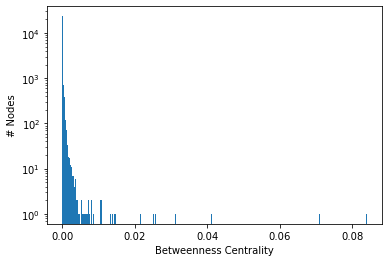

In [64]:
plt.hist(list(bc3.values()), bins=500, log=True)
plt.xlabel('Betweenness Centrality')
plt.ylabel('# Nodes')

print("Average betweenness centrality:", mean(list(bc3.values())))

### Eigenvector centrality

Average Eigenvector centrality: 0.00249834275697272


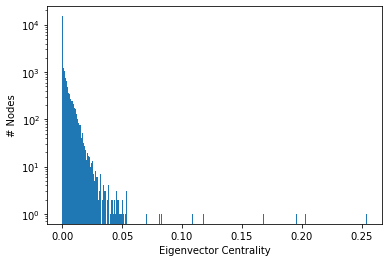

In [34]:
eigen_c = nx.eigenvector_centrality(g3)

plt.hist(list(eigen_c.values()), bins=500, log=True)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('# Nodes')

print("Average Eigenvector centrality:", mean(list(eigen_c.values())))

### Output as `GML`

Write a code to store the graph in a file that is readable by Gephi (Hint: Use NetworkX `write_gml` method.) Make sure to add the betweenness centrality and degree of each node as an attribute of each node to be stored in this file for the next task.

In [45]:
nx.write_gml(g3, "g3.gml")

## Erdos Network- Collaboration Network analysis

In [5]:
%%time

# Undirected network
g4 = nx.Graph()

# Add Paul Erdos into our network at first
dict_authors = {}
dict_authors['Paul Erdos'] = 0
g4.add_node(0)
g4.node[0]['author'] = 'Paul Erdos'

# Add the authors with Erdos number 1 and 2 from file
line_count = 1
skip_line = 24
skip_space = 1

is_new = False
author = ""
coauthor = ""
index = 1
ind_author = 1
ind_coauthor = 1

def parseLine(l, start):
    end = start
    while end < len(l) - 1 and not (l[end] == ' ' and l[end + 1] == ' '):
        end += 1
    return l[start:end]

def addAuthor(auth, ind):
    if auth in dict_authors:
        return ind
    dict_authors[auth] = ind
    return ind + 1

for l in open("/datasets/ece227-fa19-public/data/erdos/Erdos1.html"):    
    if line_count >= skip_line:
        if l == '\n':
            is_new = True
        elif is_new:
            author = parseLine(l, 0)
            index = addAuthor(author, index)
            ind_author = dict_authors[author]
            g4.add_edge(0, ind_author)
            g4.node[ind_author]['author'] = author
            is_new = False
        elif l == '</pre>':
            break
        else:
            coauthor = parseLine(l, skip_space)
            index = addAuthor(coauthor, index)
            ind_coauthor = dict_authors[coauthor]
            g4.add_edge(ind_author, ind_coauthor)
            g4.node[ind_coauthor]['author'] = coauthor
    line_count += 1

print(nx.info(g4))

Name: 
Type: Graph
Number of nodes: 11524
Number of edges: 18504
Average degree:   3.2114
CPU times: user 186 ms, sys: 14.2 ms, total: 200 ms
Wall time: 199 ms


### Degree distribution

In [6]:
# Update node attributes
for node in g4.nodes():
    g4.nodes[node]['deg'] = g4.degree[node]

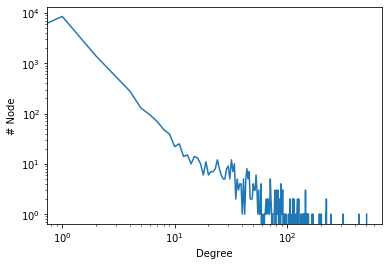

In [10]:
plt.xlabel("Degree")
plt.ylabel("# Node")
plt.loglog(nx.degree_histogram(g4))

### Network diameter and average shortest path

In [13]:
nx.is_connected(g4)

True

The graph is connected and thus we can find the diameter and average shortest path length on the graph.

In [14]:
%%time
diameter = nx.diameter(g4)
print("Network diameter:", diameter)

Network diameter: 4
CPU times: user 5min 26s, sys: 80.8 ms, total: 5min 26s
Wall time: 5min 29s


In [15]:
%%time
avg_spl = nx.average_shortest_path_length(g4)
print("Average Shortest path length:", avg_spl)

Average Shortest path length: 3.821987433309889
CPU times: user 5min 28s, sys: 27 ms, total: 5min 28s
Wall time: 5min 31s


### Clustering coefficients

Average clusterng coefficient: 0.10586960819655972


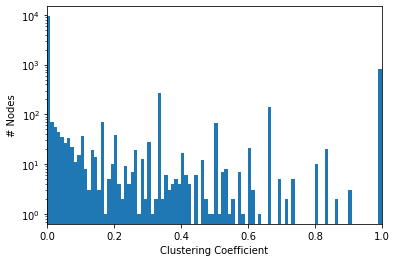

In [17]:
cc = nx.clustering(g4)

plt.hist(list(cc.values()), bins=100, log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('# Nodes')
plt.xlim([0, 1])

print("Average clusterng coefficient:", mean(list(cc.values())))

### Degree centrality

Average degree centrality: 0.00027869347702735273


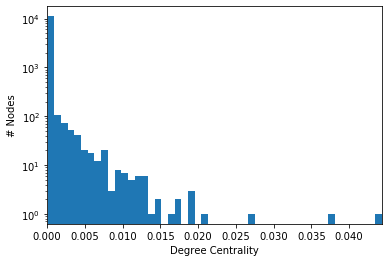

In [18]:
dc = nx.degree_centrality(g4)

plt.hist(list(dc.values()), bins=50, log=True)

plt.xlabel('Degree Centrality')
plt.ylabel('# Nodes')

plt.xlim([0, max(dc.values())])

print("Average degree centrality:", mean(list(dc.values())))

### Betweenness centrality

In [19]:
%%time
bc4 = nx.betweenness_centrality(g4)

# Update node attributes
for node in g4.nodes():
    g4.nodes[node]['bc'] = bc4[node]

CPU times: user 10min 30s, sys: 185 ms, total: 10min 30s
Wall time: 10min 38s


Average betweenness centrality: 0.00024492166579672845


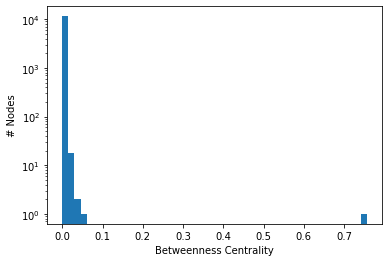

In [22]:
plt.hist(list(bc4.values()), bins=50, log=True)
plt.xlabel('Betweenness Centrality')
plt.ylabel('# Nodes')

print("Average betweenness centrality:", mean(list(bc4.values())))

### Eigenvector centrality

Average Eigenvector centrality: 0.00322617041778304


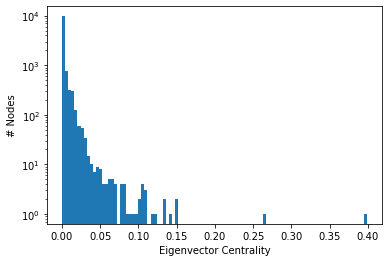

In [24]:
eigen_c = nx.eigenvector_centrality(g4)

plt.hist(list(eigen_c.values()), bins=100, log=True)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('# Nodes')

print("Average Eigenvector centrality:", mean(list(eigen_c.values())))

### Output as `GML`

Write a code to store the graph in a file that is readable by Gephi (Hint: Use NetworkX `write_gml` method.) Make sure to add the betweenness centrality and degree of each node as an attribute of each node to be stored in this file for the next task.

In [25]:
nx.write_gml(g4, "g4.gml")

## Task 2


In this task we will use Gephi to visualize the networks that you analyzed. In the previous task, you saved the graph in the graphml format such that each node has its **degree** and its **betweenness centrality** as its attribute. In this task, you are going to use these attributes to have a better visualization of the graph. Follow these steps to obtain a nice and meaningful visualization of the graphs:

- Open Gephi.
- Open the '.gml' file of a network.
- Change 'Layout' of the graph to Force Atlas 2, etc. to have a better visualisation.
- In the 'Appearance' window there are multiple options to change the appearance of the nodes/ edges of the graph according to various network properties like degree, clustering coefficient, modularity class, etc.
- Set the node sizes according to Degree distribution.
- Save the image file and include it in the following cell for each of the above networks.


Respond to the following questions for the **Facebook** and **Enron-email** datasets.

1. Visualize the network in Gephi by using a suitable layout, with the node size as well as the node label / Id proportional to the degree distribution of each node. Use 3 different colors to differentiate nodes with high, moderate and low degree distributions.
2. Repeat 1. with the node size as well as the node label / Id size proportional to the betweenness centrality.
3. Analyze all the graphs and explain which of the nodes according to you are the most important ones, as far as the network structure is concerned. Why?

### Graph images

Please see folder `facebook/`, `enron/`, `citNet/` and `erdos/` for the images of the graph visualization.

### Most important nodes in the Facebook dataset

Nodes are colored according to degree and betweenness centrality (red to light yellow to blue, decreasing importance). Some most important ones are:

- Node 107, 1912, 1684 (shown in read)
- Node 3437, 0, 483, 348, 2347, 2543 (shown in light yellow)


### Most important nodes in the Enron-email dataset

Nodes are colored according to degree and betweenness centrality (red to light yellow to blue, decreasing importance). Some most important ones are:

- Node 5038, 1139, 458, 195, 136, 370, 1028, 273, 140 (shown in read)

### Remarks

We can also observe that in the Facebook dataset there are some nodes with extremely high degree and betweenness centrality compared with others, whereas in the Enron-email dataset, node degrees are more evenly distributed. This can be explained by the intrinsical difference between the strucutre of these two networks.